In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.arange(0,1,0.02)
print(X[:3])
y=0.66778*X+0.98761
print(y[:3])
print(len(X),len(y))

[0.   0.02 0.04]
[0.98761   1.0009656 1.0143212]
50 50


In [3]:
split = int(len(X)*0.8)
X_train, y_train=X[:split], y[:split]
X_test, y_test=X[split:], y[split:]
print(f'Length of X_train={len(X_train)}\nLength of y_train={len(y_train)}')
print(f'Length of X_test={len(X_test)}\nLength of y_test={len(y_test)}')

Length of X_train=40
Length of y_train=40
Length of X_test=10
Length of y_test=10


In [4]:
def plot_data(X_train=X_train,y_train=y_train,X_test=X_test, y_test=y_test,prediction=None):
    plt.scatter(X_train, y_train,c='b',label='Training data')
    plt.scatter(X_test, y_test,c='g',label='Training data')
    if prediction is not None:
        plt.scatter(X_test, prediction,c='r',label='predicted data')
    plt.legend()
    plt.show()



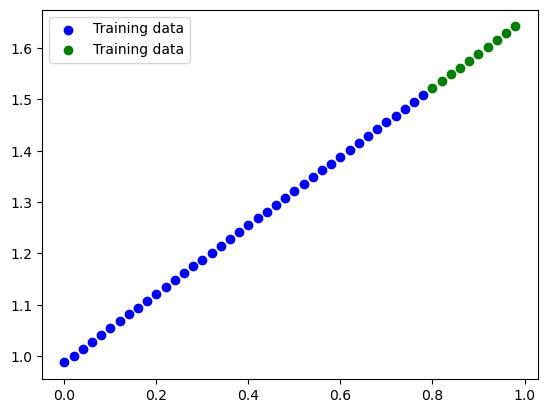

In [5]:
plot_data()

In [6]:
weight = np.random.randn()
bias = np.random.randn()
print(f'initially weight={weight}and bias={bias}')

initially weight=0.31847895446036534and bias=1.4754857263533345


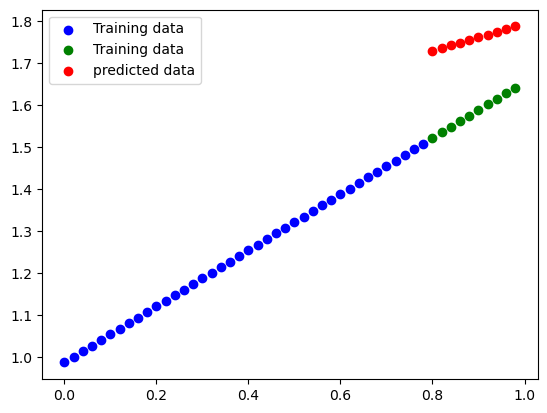

In [7]:
y_pred=X_test*weight+bias
plot_data(prediction=y_pred)

In [8]:
def loss_fn(y_true, y_pred):
    return np.sum(np.square(y_true-y_pred))/len(y_true)

In [9]:
alpha = 0.1
epochs =200
train_loss_list=[]
test_loss_list=[]
for epoch in range(epochs):
    #forward pass
    train_pred = X_train*weight+bias
    train_loss = loss_fn(y_true=y_train,y_pred=train_pred)
    # Compute the gradients
    gradientw=(-2/len(X_train))*np.sum((y_train-train_pred)*X_train)
    gradientb=(-2/len(X_train))*np.sum((y_train-train_pred))

    weight = weight - gradientw*alpha
    bias = bias - gradientb*alpha

    test_pred = X_test*weight+bias
    test_loss = loss_fn(y_true=y_test, y_pred=test_pred)
    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)
    if(epochs+1)%10==0:
        print(f'Epoch {epochs+1}|Train Loss {train_loss:.4f} Test loss {test_loss:.4f}')



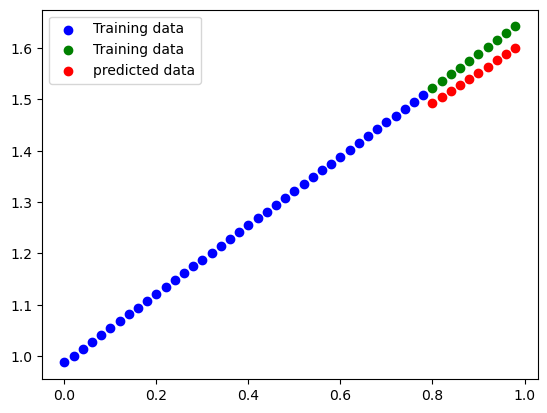

In [10]:
y_pred=X_test*weight+bias
plot_data(prediction=y_pred)

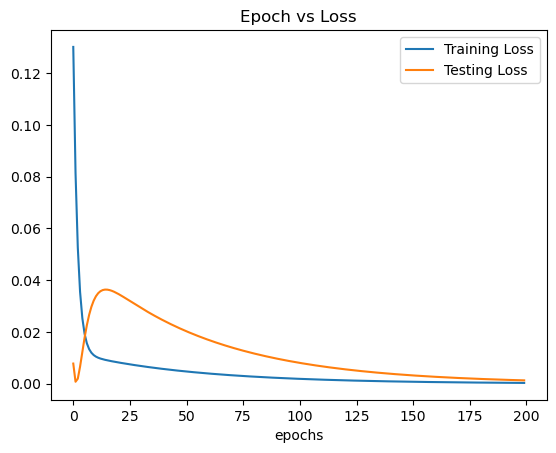

In [11]:
plt.plot(range(epochs),train_loss_list, label="Training Loss")
plt.plot(range(epochs),test_loss_list, label="Testing Loss")
plt.title("Epoch vs Loss")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [12]:
import torch

In [13]:
print(f'Using version {torch.__version__}')
if torch.cuda.is_available():
    device ='cuda'
elif torch.backends.mps.is_available():
    device='mps'
else:
    device='cpu'
print(f'Using {device}')



Using version 2.10.0
Using mps


In [14]:
from torch import nn
class LinearRegressionNetwork(nn.module):
    def __init__(self):
        super().init__()
        self.weights =nn.parameter(
            torch.randn(1,requires_grad=True,dtype=torch.float)
        )
        self.bias =nn.parameter(
            torch.randn(1,requires_grad=True,dtype=torch.float)
        )

AttributeError: module 'torch.nn' has no attribute 'module'